In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pypfopt.efficient_frontier import EfficientFrontier
%matplotlib inline
# https://datacoach.me/investment/finpy/python-wealthnavi/

In [2]:
#　データ設定(2019年4月時点)
assetName = ['Stock_US', 'Stock_Japan', 'Stock_EM',
             'Bond_US', 'Bond_PL', 'Gold', 'Estate']
risk = [0.129, 0.148, 0.181, 0.029, 0.044, 0.157, 0.166]
r = [0.072, 0.081, 0.088, 0.026, 0.028, 0.037, 0.068]
cor = np.array([[1, 0.9, 0.7, -0.1, 0.1, 0.0, 0.7],
                [0.9, 1, 0.8, 0, 0.2, 0.1, 0.6],
                [0.7, 0.8, 1, 0.1, 0.3, 0.3, 0.5],
                [-0.1, 0, 0.1, 1, 0.8, 0.4, 0.3],
                [0.1, 0.2, 0.3, 0.8, 1, 0.5, 0.3],
                [0, 0.1, 0.3, 0.4, 0.5, 1, 0.1],
                [0.7, 0.6, 0.5, 0.3, 0.3, 0.1, 1]])

In [3]:
# 共分散行列計算
riskDiag = np.diag(risk)
cov = np.dot(np.dot(riskDiag, cor), riskDiag)
df = pd.DataFrame(cov, index = assetName, columns=assetName)

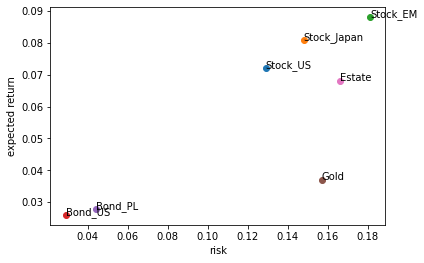

In [4]:
for (i,j,k) in zip(risk,r,assetName):
    plt.scatter(i,j)
    plt.annotate(k, xy=(i, j))

plt.style.use('ggplot')
plt.xlabel("risk")
plt.ylabel("expected return")
plt.show()

<AxesSubplot:>

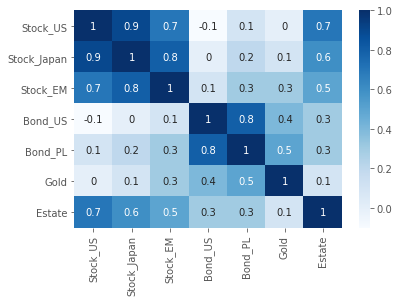

In [5]:
#相関行列ヒートマップ
sns.heatmap(cor, annot=True, xticklabels=assetName, 
            yticklabels=assetName, cmap='Blues')

In [6]:
# 分散最小化
ef = EfficientFrontier(r, df)
trets = np.arange(0.030, 0.085, 0.001)
tvols = []
tweights = []
for tr in trets:
    w = ef.efficient_return(target_return=tr)
    w = pd.Series(w).values
    v = np.sqrt(np.dot(w.T, np.dot(cov, w)))
    tvols += [v]
    tweights += [w]

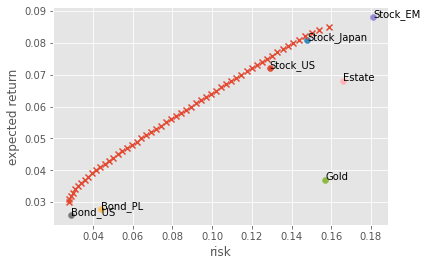

In [7]:
# 各資産のリスク・リターン
for (i,j,k) in zip(risk,r,assetName):
    plt.scatter(i,j)
    plt.annotate(k, xy=(i, j))

# ポートフォリオのリスク・リターン（効率的フロンティア）
plt.scatter(tvols, trets, marker='x')
plt.xlabel('risk')
plt.ylabel('expected return')

plt.show()

(0.0, 1.0)

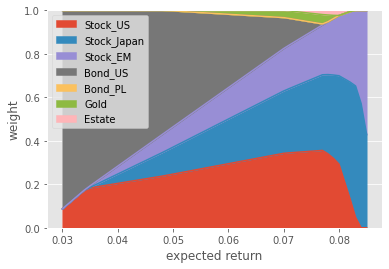

In [8]:
dfWeights = pd.DataFrame(tweights,index = trets, columns = assetName)
dfWeights.plot.area()
plt.xlabel("expected return")
plt.ylabel("weight")
plt.ylim([0,1])

In [11]:
# 上限下限制約
ef = EfficientFrontier(r, df, weight_bounds=(0.05, 0.35))
trets2 = np.arange(0.04, 0.07, 0.001)
tvols2 = []
tweights2 = []
for tr in trets2:
    w = ef.efficient_return(target_return=tr)
    w = pd.Series(w).values
    v = np.sqrt(np.dot(w.T, np.dot(cov, w)))
    tvols2 += [v]
    tweights2 += [w]

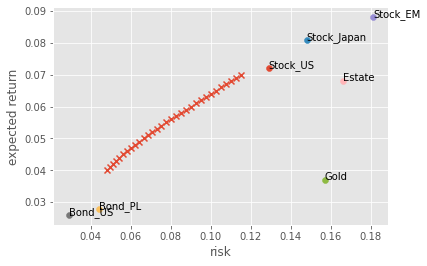

In [12]:
# 各資産のリスク・リターン
for (i,j,k) in zip(risk,r,assetName):
    plt.scatter(i,j)
    plt.annotate(k, xy=(i, j))

# ポートフォリオのリスク・リターン（効率的フロンティア）
plt.scatter(tvols2, trets2, marker='x')
plt.xlabel('risk')
plt.ylabel('expected return')

plt.show()

(0.0, 1.0)

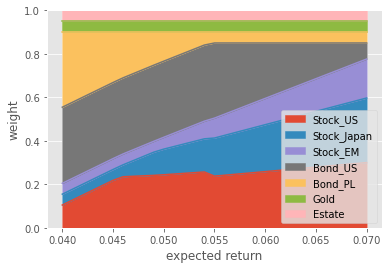

In [13]:
dfWeights2 = pd.DataFrame(tweights2, index= trets2,columns = assetName)
dfWeights2.plot.area()
plt.xlabel("expected return")
plt.ylabel("weight")
plt.ylim([0,1])